# **Welcome to the Preprocessing Demo Notebook**

In this demo notebook we go through the `lang_detect.py` and `text_prep.py`  modules, and demonstrate their functionality.<br>

**Note:** It is needed to run the webscraping notebook first in order to obtain the master's theses.

**Disclaimer:** The notebook was run by the authors on the "mavis" computing server (1024 GB memory; 40 physical cores at 3.1 GHz) of the Humboldt Lab for Empirical and Quantitative Research. Execution time may be significantly longer for other users.

### **The Dependencies**

First  import some basic libraries and then install the requirements to set up the environment needed for the project. 

**Note:** It is not needed to install the requirements again if the user has already installed them in another module of the project.

In [ ]:
# Install Requirements
!pip install -r ../requirements.txt

In [3]:
# Basic libraries
import re
import os
import gc
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import time

import sys
sys.path.append("..")
from measure_time import measure_time

In [2]:
os.getcwd()

'/home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_2_Preprocessing'

## **The Pre-Processing**

1. The first thing that needs to be done is to gather all English-language entries among the PDF files.
For this purpose, we have defined a function `en_detect` in the `lang_detect` module, which takes as argument our directory and the files inside, scans them and removes the non-English language entries (e.g. German entries).<br>

**Note:** It is important not to have saved any .ipynb checkpoints in the folders containing the documents that will be processed throughout. This may interfere with the execution. Make sure to disable checkpoint generation by Jupyter, or manually remove any checkpoints.

**Reproducibility Disclaimer:**
Besides the theses obtained via scraping, the authors have in the following steps included 11 theses obtained through physical copies and CD-s, not accessible on the HU website. Thus, pre-processing results will differ for other users.

In [5]:
# Set folder to download the files. 
folder = '../LDA_MSc_1_Webscraping/OCRed PDFs'
theses = os.listdir(folder) 


In [4]:
from lang_detect import en_detect
en_detect?

Signature: en_detect(folder=None, theses=None)
Docstring:
Goes through the scraped and downloaded PDF files and scans them to see if they are in English. 
This is necessary because some of the documents are in German (and some are unreadable).
To save memory, automatically selected to check pages 8, 12, 16, 20, 24; which should in all likelihood cases be body of text.
File:      ~/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_2_Preprocessing/lang_detect.py
Type:      function

In [5]:
# Set beginning time
st = time.time()

# Run the function
english_list = en_detect(folder, theses)

# Measure time spent on execution
measure_time(st)


Current working directory: /home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_2_Preprocessing

Currently working on 30.lykhnenko.pdf_2016-01-12.pdf.
It was identified as English.

Currently working on 1.master_garcia_gonzalo.pdf_2021-08-26.pdf.
It was identified as English.

Currently working on 54.gschoepf.pdf_2014-07-23.pdf.
It was identified as English.

Currently working on 2.master_song_ranqing.pdf_2021-08-19.pdf.
It was identified as English.

Currently working on 31.bochmann.pdf_2016-12-15.pdf.
It was identified as English.

Currently working on 3.masterthesis_winkel_julian.pdf_2021-04-13.pdf.
It was identified as English.

Currently working on 32.stepanchenko.pdf_2016-06-29.pdf.
It was identified as English.

Currently working on 4.master_hauesler_konstantin.pdf_2021-03-05.pdf.
It was identified as English.

Currently working on 33.wesselhoefft.pdf_2016-02-28.pdf.
It was identified as Engli

In [1]:
from lang_detect import de_detect
de_detect?

Signature: de_detect(folder=None, theses=None)
Docstring:
Goes through the scraped and downloaded PDF files and scans them to see if they are in German. 
To save memory, automatically selected to check pages 8, 12, 16, 20, 24; which should in all likelihood cases be body of text.
File:      ~/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_2_Preprocessing/lang_detect.py
Type:      function

It is always good to double check, especially given the specifics of the language detection functions we defined. Therefore we also use the function defined for detecting German-language entries in order to see if there were still some non-English entries left in our directory.

In [6]:
# Set beginning time
st = time.time()

# Run the function
german_list = de_detect(folder, theses)

# Measure time spent on execution
measure_time(st)


Current working directory: /home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_2_Preprocessing

Currently working on 30.lykhnenko.pdf_2016-01-12.pdf.

Currently working on 1.master_garcia_gonzalo.pdf_2021-08-26.pdf.

Currently working on 54.gschoepf.pdf_2014-07-23.pdf.

Currently working on 2.master_song_ranqing.pdf_2021-08-19.pdf.

Currently working on 31.bochmann.pdf_2016-12-15.pdf.

Currently working on 3.masterthesis_winkel_julian.pdf_2021-04-13.pdf.

Currently working on 32.stepanchenko.pdf_2016-06-29.pdf.

Currently working on 4.master_hauesler_konstantin.pdf_2021-03-05.pdf.

Currently working on 33.wesselhoefft.pdf_2016-02-28.pdf.

Currently working on 5.master_truesdale_alex.pdf_2021-03-04.pdf.

Currently working on 34.weber.pdf_2015-12-09.pdf.

Currently working on 6.master_morishige_guillermo.pdf_2020-11-04.pdf.

Currently working on 35.steck.pdf_2015-12-09.pdf.

Currently working on 7.mas

- - -
**Note:** Besides the documents above, `118.su` was manually dropped as it kept freezing the function at any pc the authors ran it from. `113.aydinli` was also manually cropped in half since half of the papers was code, but this step could be skipped as one paper will not affect the overall model adversely. 

In the end we have $121$ documents left to continue with the preprocessing.
- - -
2. Now we move on to the preprocessing part using the function `preprocess_text` from text_prep.py

What does the function do?

For every document in our directory it:
- makes text lower case
- removes non alphabetic characters
- removes stop words
- removes single-character words and other possible PDF reading mistakes
- lemmatizes words
- renders the processed theses as `.txt` files

This helps significantly reduce dimensions and get rid of noise in our data.

**Additional Functionality (Somewhat Costly):**

We have further included additional, but fairly computationally costly, functionality within the function that can be turned on by setting argument `verbose = True`.

Using this, the function will save and count the word tokens at every stage of the preprocessing and automately generate plots for additional insight into the dimensionality reduction process.


In [7]:
# Import function
from text_prep import preprocess_text

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/RDC/anasashb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
# See function arguments
preprocess_text?

Signature:
preprocess_text(
    first_input_folder=None,
    theses=None,
    inter_output_folder=None,
    verbose=False,
)
Docstring:
Preprocesses the PDF files by making everything lowercase,
getting rid of non-alphabetic words, removing stopwords,
tokenizing, lemmatizing, removing words with less than 3 character.

Args:
    first_input_folder (str): Path to the folder containing the PDF files.
    
    theses: os.listdir(folder).
            
    inter_output_folder (str): Intermediate output folder to save the filtered theses.
            
    verbose (bool): Returns vizualizations and information about dimensionality reduction. Can be set to False to save computational power, memory and time when working with large corpora of files.

Returns:
    None. Filthered theses saved in new folder.
File:      ~/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_2_Preprocessing/text_prep.py
Type:      function

In [9]:
# Set arguments. 
first_input_folder = folder
theses = os.listdir(first_input_folder) 
inter_output_folder = 'Filtered Theses'
os.makedirs(inter_output_folder, exist_ok = True)


Current working directory: /home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-split-quantlets/DEDA_class_SoSe2023_LDA_Theses/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_MSc_2_Preprocessing

Currently working on 30.lykhnenko.pdf_2016-01-12.pdf.

Currently working on 1.master_garcia_gonzalo.pdf_2021-08-26.pdf.

Currently working on 54.gschoepf.pdf_2014-07-23.pdf.

Currently working on 2.master_song_ranqing.pdf_2021-08-19.pdf.

Currently working on 31.bochmann.pdf_2016-12-15.pdf.

Currently working on 3.masterthesis_winkel_julian.pdf_2021-04-13.pdf.

Currently working on 32.stepanchenko.pdf_2016-06-29.pdf.

Currently working on 4.master_hauesler_konstantin.pdf_2021-03-05.pdf.

Currently working on 33.wesselhoefft.pdf_2016-02-28.pdf.

Currently working on 5.master_truesdale_alex.pdf_2021-03-04.pdf.

Currently working on 34.weber.pdf_2015-12-09.pdf.

Currently working on 6.master_morishige_guillermo.pdf_2020-11-04.pdf.

Currently working on 35.steck.pdf_2015-12-09.pdf.

Currently working on 7.mast

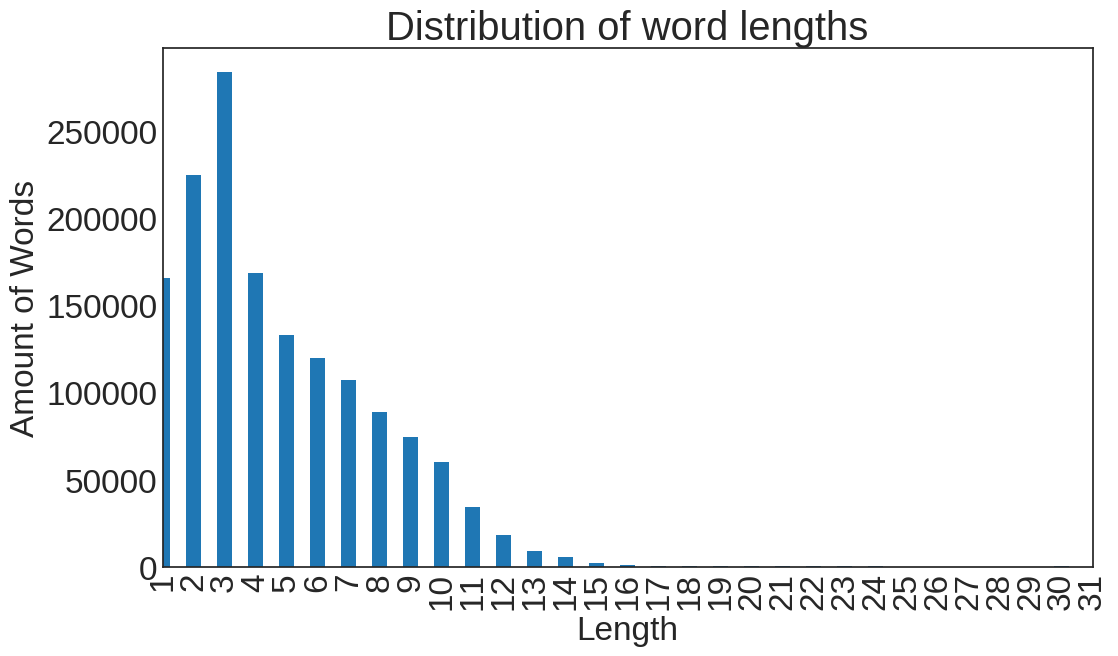


Total amount of words before dropping single character words: 1514969 


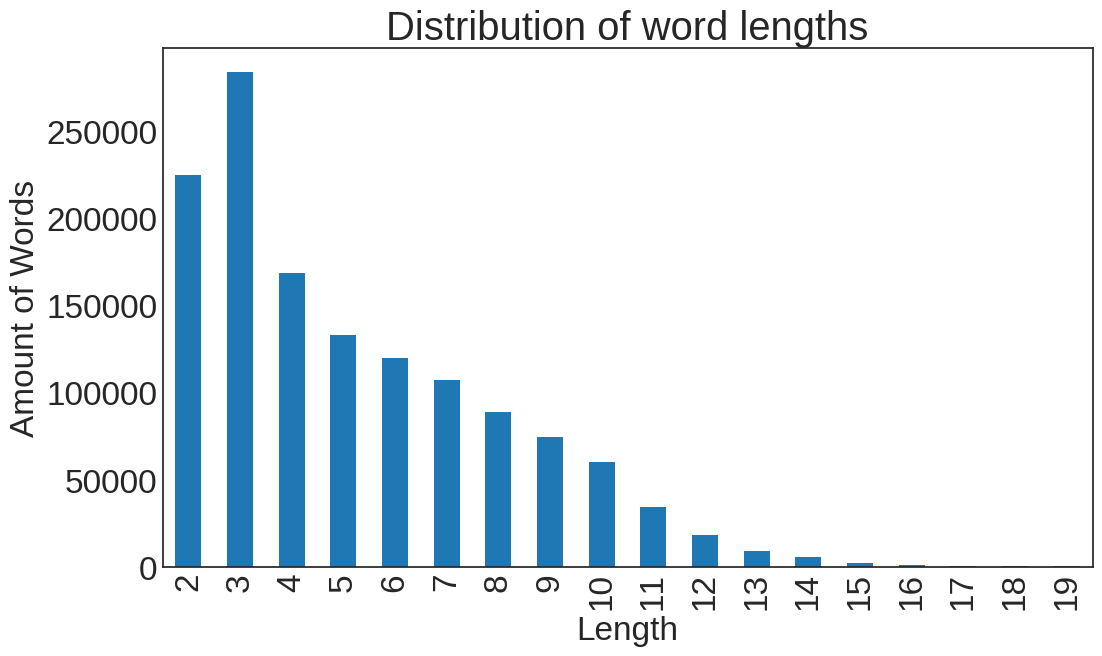


Total amount of words after dropping single character words and other pdf reader mistakes: 1336137 


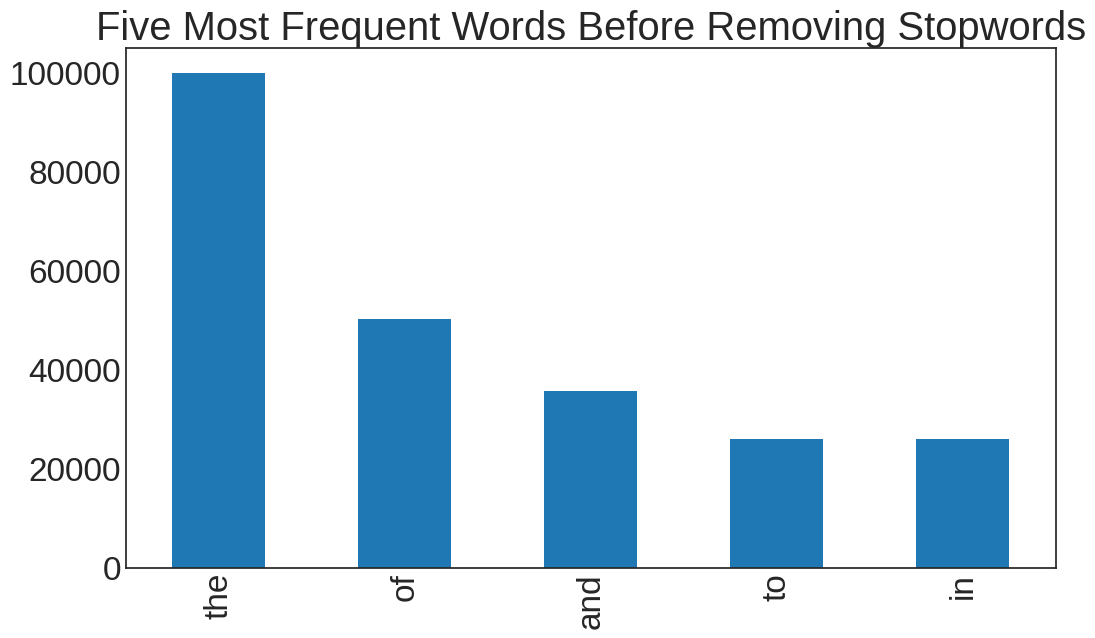


Total amount of words before removing stopwords: 1336137


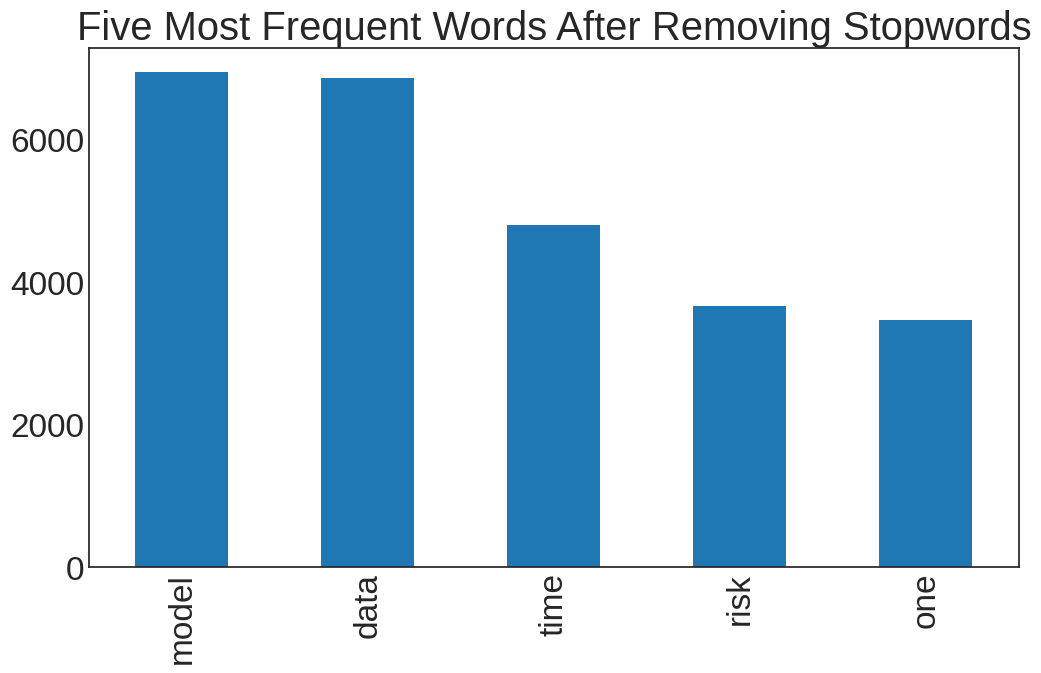


Total amount of words after removing stopwords: 823030


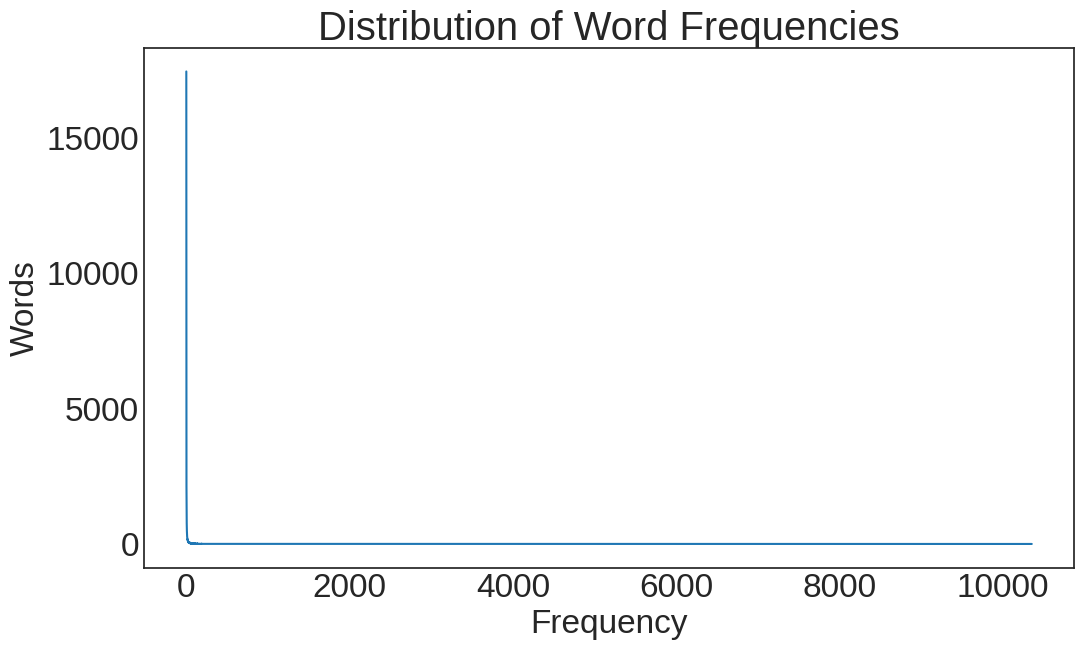

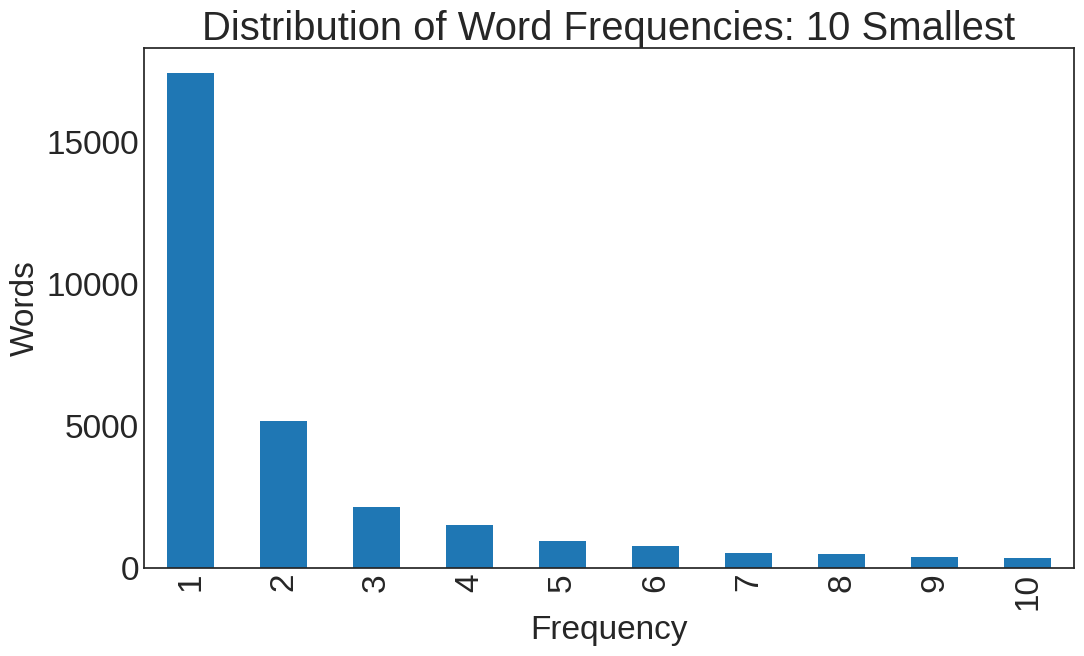




Preprocessing succesfully completed.

Execution time: 0 hours 20 minutes 3 seconds


In [10]:
# Set begin time
st = time.time()

# Run the function
preprocess_text(first_input_folder, theses, inter_output_folder, verbose = True)

# Measure execution time
measure_time(st)